**Factors in the Development of Heart Disease**

Riley McNair, Lucas Wong, Yusen Wu, Kevin Zhu

**Introduction**

Heart disease is one of North America's leading causes of death in adults. Heart disease can lead to increased risks of heart failure and attacks and sometimes death. Many factors contribute to people's increased likeliness of getting heart disease. </br></br>

**Question**: Which of the following factors, cholesterol, resting blood pressure, max heart rate, and age, is a significant indicator of heart disease in each gender? Each of these variables has been linked to heart disease in people. The CDC states that high cholesterol levels and blood pressure are linked to the cause of heart disease (CDC 2022). Exercise and age also play a vital role in the development of heart disease within individuals (Rodgers et al. 2019). 

Load required packages:

In [1]:
# load packages
library(tidyverse) # needed for many functions used for data analysis, such as read_csv(), select(), etc.
library(repr)
library(infer) #needed for bootstraping and editing the data and plots

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Read in the data from UC Irvine's Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease via a zip file:

In [2]:
# read in dataset from web
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
download.file(url, "cleveland_data.zip")
unzip("cleveland_data.zip")
cleveland_original <- read_csv("processed.cleveland.data",
                               col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs",
                                        "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
                               show_col_types = FALSE)

# preview first 5 rows of the dataframe
head(cleveland_original, 5)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Filter the categories we will be using. This includes age, sex, resting blood pressure, max heart rate, cholesteral levels, and the presence of heart disease. We have tidied the num category (which originally had other numerical values), which represents the presence of heart disease, 0 = no heart disease, 1 = heart disease present. 

In [3]:
# select for columns we'll use
cleveland <- select(cleveland_original, age, sex, trestbps, chol, thalach, num)

# convert num column to binary (0 = no heart disease; 1 = presence of heart disease)
cleveland <- cleveland |>
    mutate(num = as.factor(ifelse(num != 0, 1, 0)))

# preview first 5 rows of new dataframe
head(cleveland, 5)

age,sex,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,150,0
67,1,160,286,108,1
67,1,120,229,129,1
37,1,130,250,187,0
41,0,130,204,172,0


Visualizing preliminary relationships between data:

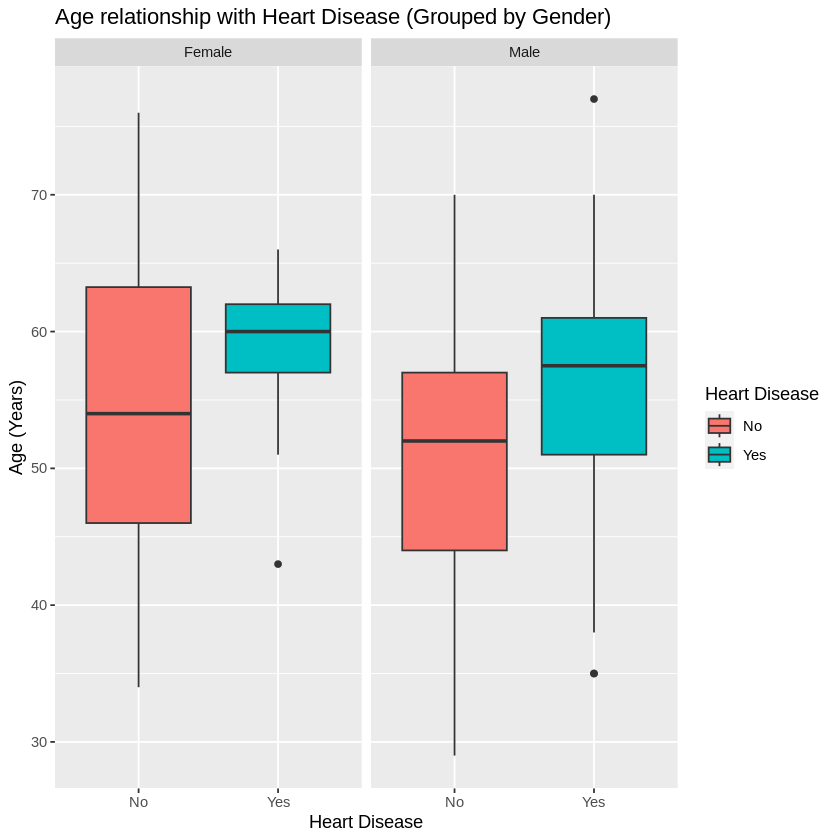

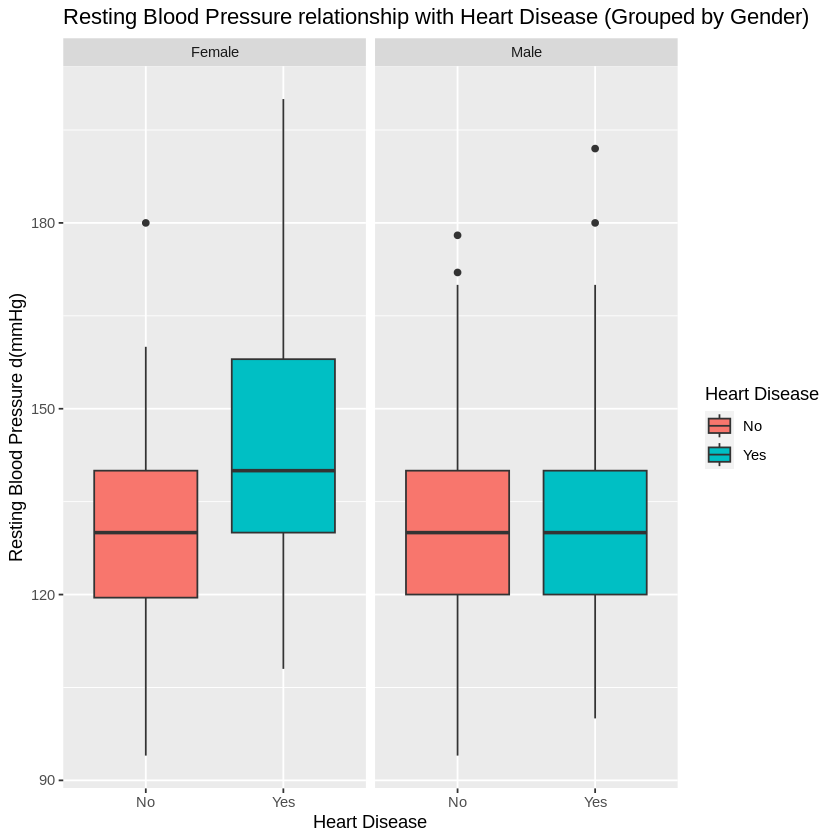

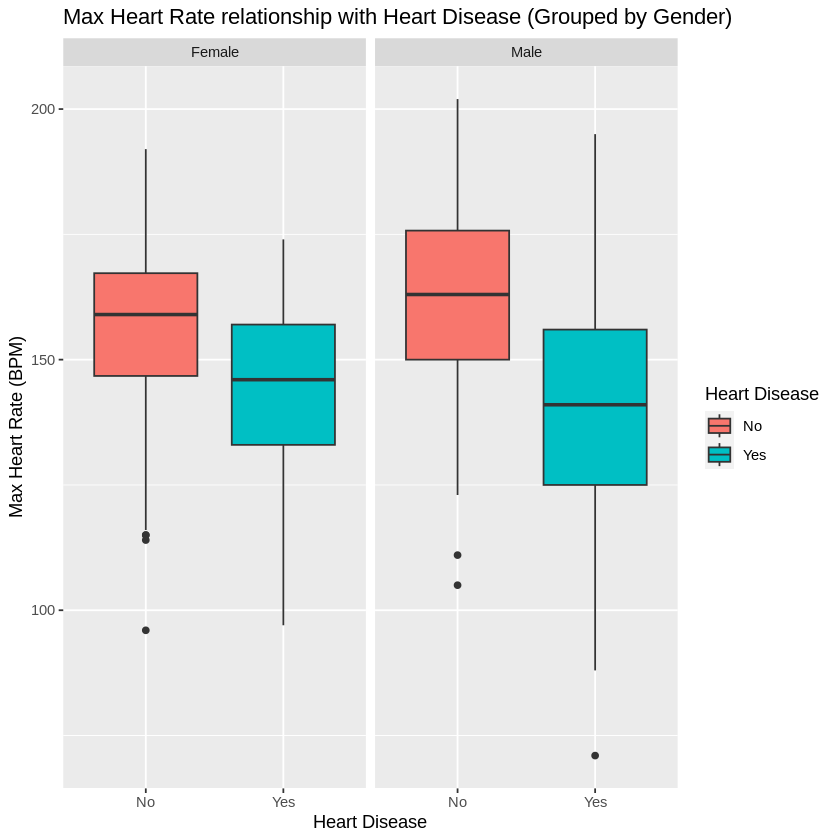

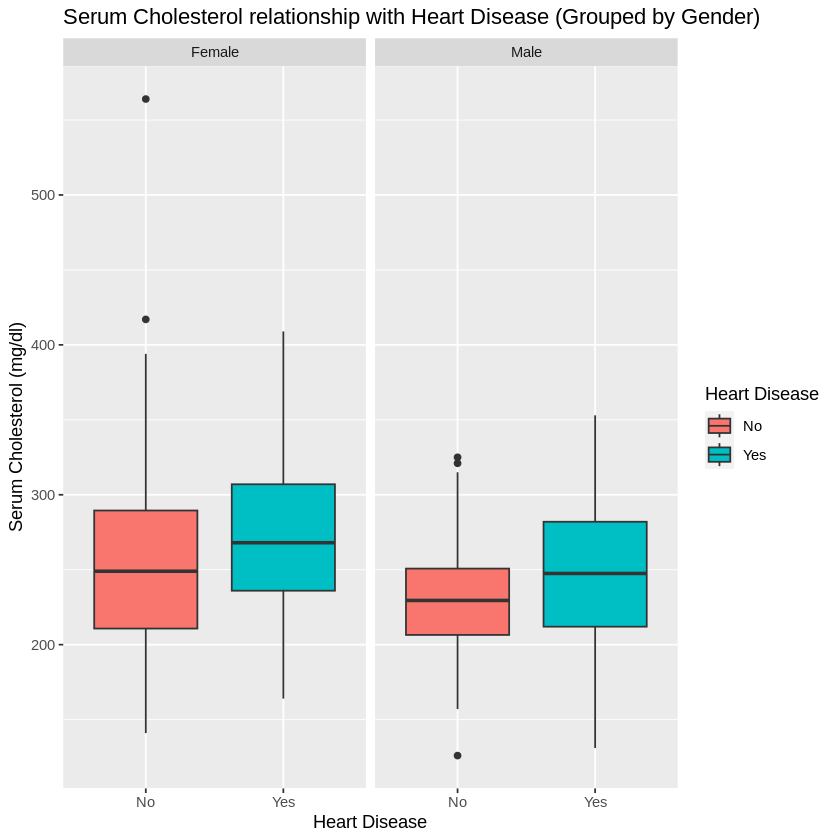

In [4]:
#Temporary dataframe to make labelling plots more convienient
labelled_data <- mutate(cleveland, sex = ifelse(sex == 1, "Male", "Female"), 
                                   num = ifelse(num == 1, "Yes", "No"))

#Age Vs heart disease plot
age_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=age, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Age (Years)") + 
            ggtitle("Age relationship with Heart Disease (Grouped by Gender)")

#Resting blood pressure vs heart disease plot
bp_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=trestbps, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Resting Blood Pressure d(mmHg)") + 
            ggtitle("Resting Blood Pressure relationship with Heart Disease (Grouped by Gender)")

#Max heart rate during exercise vs heart disease plot
maxhr_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=thalach, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Max Heart Rate (BPM)") + 
            ggtitle("Max Heart Rate relationship with Heart Disease (Grouped by Gender)")

#Serum cholesterol vs heart disease plot
chol_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=chol, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Serum Cholesterol (mg/dl)") + 
            ggtitle("Serum Cholesterol relationship with Heart Disease (Grouped by Gender)")

#Display plots
age_hd
bp_hd
maxhr_hd
chol_hd

## TODO:
Discuss why we chose max heart rate as the variable of choice

## TODO:
code for bootstrapping CI/Hypothesis tests for max heart rate (by gender):

In [5]:
##code here

## TODO:
code for CLT (theory) CI/Hypothesis tests for max heart rate (by gender):

In [6]:
##code here

## TODO: 
Discuss results from above code

## TODO:
conclude about our research question, and provide ideas for further investigation

## TODO: 
references